In [1]:
import os
import sys
home_dir = "../../"
module_path = os.path.abspath(os.path.join(home_dir))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import pandas as pd
from scipy.stats import spearmanr, pearsonr

import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
model_name = "unirep" # unirep, protbert
result_df = pd.read_csv(home_dir+f"models/tape_rao/outputs/popu_freq_preds_{model_name}_(mt-wt).csv", sep="\t")
print(result_df.shape)
result_df[result_df["mt_freq"]==0.0]

(95324, 14)


,snp_id,chrom_acc_version,chrom_pos,ref_allele,alt_allele,prot_acc_version,prot_pos,wt,mut,wt_population,mut_poulation,wt_freq,mt_freq,pred


Common: 18295, rare: 29468


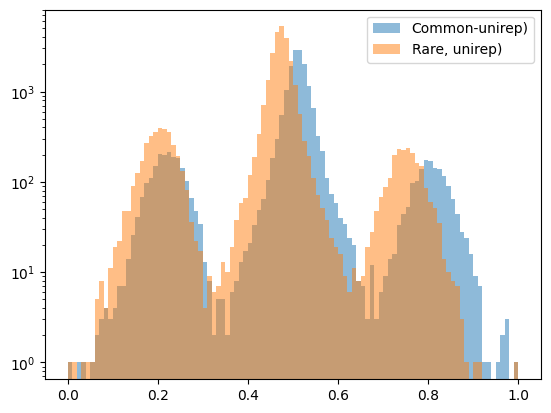

In [3]:
common = result_df[result_df["mt_freq"]>=.01]
rare = result_df[(result_df["mt_freq"]<.01) & (result_df["mt_freq"]>=.001)]
print(f"Common: {common.shape[0]}, rare: {rare.shape[0]}")

common_pred=(common["pred"]-common["pred"].min())/(common["pred"].max()-common["pred"].min())
rare_pred=(rare["pred"]-rare["pred"].min())/(rare["pred"].max()-rare["pred"].min())

plt.hist(common_pred, bins=100, density=False, log=True, alpha=.5, label=f"Common-{model_name})")
plt.hist(rare_pred, bins=100, density=False, log=True, alpha=.5, label=f"Rare, {model_name})")
plt.legend()
plt.show()

/tmp/ipykernel_2839023/2367323992.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  common.loc[common_pred_normalized.index, "pred_normalized"] = common_pred_normalized
/tmp/ipykernel_2839023/2367323992.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rare.loc[rare_pred_normalized.index, "pred_normalized"] = rare_pred_normalized


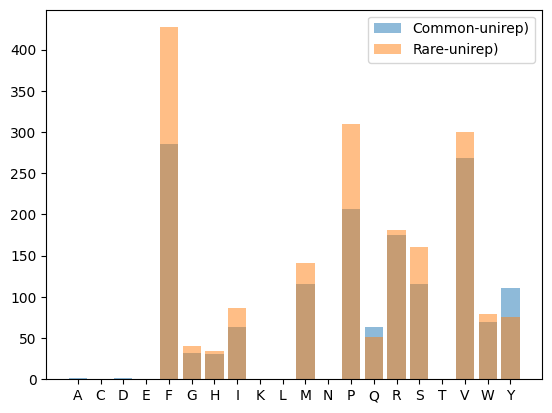

In [83]:
aa_list = common["wt"].unique()
common_pred_normalized=(common["pred"]-common["pred"].min())/(common["pred"].max()-common["pred"].min())
rare_pred_normalized=(rare["pred"]-rare["pred"].min())/(rare["pred"].max()-rare["pred"].min())

common.loc[common_pred_normalized.index, "pred_normalized"] = common_pred_normalized
rare.loc[rare_pred_normalized.index, "pred_normalized"] = rare_pred_normalized
# print(common_x)

# common_x_pred = common[common["pred_normalized"] <=.3]
# rare_x_pred = rare[rare["pred_normalized"] <=.3]
# print(rare_x_pred["mut"].value_counts(), common_x_pred["mut"].value_counts(), sep="\n")

# common_x_pred = common[(common["pred_normalized"] >.3) & (common["pred_normalized"] <=.7)]
# rare_x_pred = rare[(rare["pred_normalized"] >.3) & (rare["pred_normalized"] <=.7)]
# print(rare_x_pred["mut"].value_counts(), common_x_pred["mut"].value_counts(), sep="\n")

common_x_pred = common[common["pred_normalized"] > .7]
rare_x_pred = rare[rare["pred_normalized"] > .7]
# print(rare_x_pred["mut"].value_counts(), common_x_pred["mut"].value_counts(), sep="\n")

# common_x_pred = common[common["prot_pos"] <= 200]
# rare_x_pred = rare[rare["prot_pos"] <= 200]

# common_x_pred = common[(common["prot_pos"] > 200) & (common["prot_pos"] <= 400)]
# rare_x_pred = rare[(rare["prot_pos"] > 200) & (rare["prot_pos"] <= 400)]

# common_x_pred = common[(common["prot_pos"] > 400)]
# rare_x_pred = rare[(rare["prot_pos"] > 400)]
# print(common_x_pred.shape, rare_x_pred.shape)
# print(common_x_pred)

def get_extended_dist(common_aa_dict):
    aa_new_dict = {}
    for aa in aa_list:
        if aa in common_aa_dict.keys():
            aa_new_dict[aa] = common_aa_dict[aa]
        else: aa_new_dict[aa] = 0
    return aa_new_dict

common_aa_new_dict = get_extended_dist(common_x_pred["mut"].value_counts().to_dict())
rare_aa_new_dict = get_extended_dist(rare_x_pred["mut"].value_counts().to_dict())



# e = rare_x_pred["mut"].value_counts().to_dict()
# plt.hist(common_x_pred["mut"], density=False, log=False, alpha=.5, label=f"Common-{model_name})")
# plt.hist(rare_x_pred["mut"], density=False, log=False, alpha=.5, label=f"Rare-{model_name})")
# plt.legend()
# plt.show()

a, b = zip(*sorted(common_aa_new_dict.items()))
c, d = zip(*sorted(rare_aa_new_dict.items())) # unpack a list of pairs into two tuples
plt.bar(a, b, alpha=.5, label=f"Common-{model_name})")
plt.bar(c, d, alpha=.5, label=f"Rare-{model_name})")
plt.legend()
plt.show()

In [11]:

# normalization effect check: does not effect in the rank correlation at all
print(result_df["mt_freq"].min(), result_df["mt_freq"].max())
processed_result_df = result_df.copy()
processed_result_df["mt_freq"]=(result_df["mt_freq"]-result_df["mt_freq"].min())/(result_df["mt_freq"].max()-result_df["mt_freq"].min())
processed_result_df["pred"]=(result_df["pred"]-result_df["pred"].min())/(result_df["pred"].max()-result_df["pred"].min())

4.873223101026788e-06 0.5


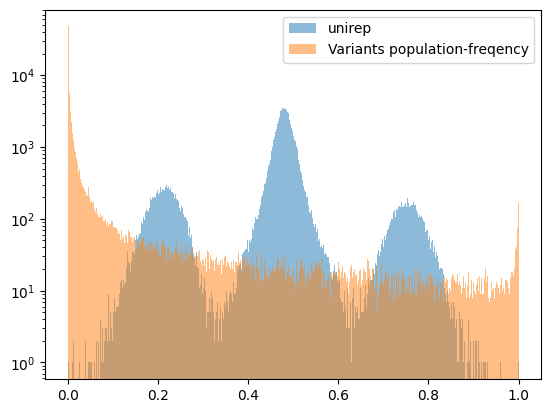

In [12]:
# bins = (np.logspace(0, 1.041392685158225, 500, base=10) - 1) / 10
# plt.hist(processed_result_df["pred"], bins, log=True, density=True, alpha=.5, label="Tape-Rao")
# plt.hist(processed_result_df["mt_freq"], bins, log=True, density=True, alpha=.5, label="Variants population-freqency")
plt.hist(processed_result_df["pred"], bins=500, log=True, alpha=.5, label=model_name)
plt.hist(processed_result_df["mt_freq"], bins=500, log=True, alpha=.5, label="Variants population-freqency")
plt.legend()
plt.show()

In [13]:
print(spearmanr(processed_result_df["pred"], processed_result_df["mt_freq"]))
print(spearmanr(result_df["pred"], result_df["mt_freq"]))
print(pearsonr(result_df["pred"], result_df["mt_freq"]))

SignificanceResult(statistic=0.02615123019571433, pvalue=6.727848828551272e-16)
SignificanceResult(statistic=0.02615123019571433, pvalue=6.727848828551272e-16)
PearsonRResult(statistic=0.023369494476442428, pvalue=5.348980390364331e-13)
